# Deep Neural Networks - Backpropagation - PyTorch
Compiled by Sneha Gupta, Shobhit Trehan and Charles Deledalle from PyTorch tutorials.  
Adapted by Aurélie Bugeau and Michaël Clément

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

## 1. Implementing a first neural network with NumPy

The objective is to learn the binary XOR function with a neural network.

As seen in class, a neural network with only one layer cannot predict the XOR function. It has no hidden layer and can therefore only classify linearly separable sets.

However the Universal Approximation Theorem states that a 2-layer neural network (with non-linear activation functions) can approximate any function.

The training set for the XOR function is defined as follows:

In [9]:
# Each data point in the XOR dataset has two variables (or features), x1 and x2, that can be either 0 or 1
# The label is their XOR combination, i.e. 1 if only x1 or only x2 is 1 while the other is 0. # If x1=x2, the label is 0.
n_samples = 500
x_train = np.random.randint(low=0, high=2, size=(n_samples, 2)).astype('float32') 
d_train = (np.sum(x_train, 1) == 1).astype('int')

# To make it slightly more challenging, we add a bit of gaussian noise to the data points.
std = 0.1
x_train += std * np.random.randn(n_samples, 2)
x_train = x_train.T

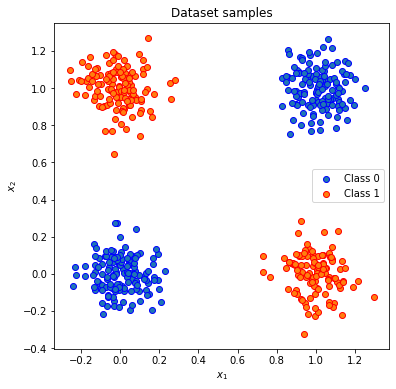

In [84]:
def visualize_samples(data, labels):
    ind0 = np.where(labels == 0)[0]
    ind1 = np.where(labels == 1)[0]
    data0 = data[ind0, :]
    data1 = data[ind1, :]
    plt.figure(figsize=(6, 6))
    plt.scatter(data0[:, 0], data0[:, 1], edgecolor='b', label="Class 0")
    plt.scatter(data1[:, 0], data1[:, 1], edgecolor='r', label="Class 1")
    plt.title("Dataset samples")
    plt.ylabel(r"$x_2$")
    plt.xlabel(r"$x_1$")
    plt.legend()

visualize_samples(x_train.T, d_train)

### **Question 1** - Defining the network

We will define a feedforward neural network with two layers: one hidden layer composed of two neurons, and one output layer with one neuron (for prediction).

The networks has the following weights and biases to be trained:
$(\mathbf{W}_1,~\mathbf{b}_1)$ for the hidden layer,
and $(\mathbf{W}_2,~\mathbf{b}_2)$ for the output layer.

What are their dimensions? Initialize them randomly.

In [85]:
w1 = np.random.rand(2,2)
b1 = np.random.rand(2,1)

w2 = np.random.rand(1,2)
b2 = np.random.rand(1,1)

### **Question 2** - Activation functions

The feed-forward algorithm works as follows:
1. Each neuron $i$ in the hidden layers $l$ receives the weighted sum of the input values:  $$a_i^l=\sum_j  h_j^{l-1} w_{ij}^l + b^l_i$$
2. Each neuron calculates an output by using an activation function $g_1$ (typically sigmoid or ReLU): $$h_i^l= g_1(a_i^l)$$ 
3. Each neuron $i$ in the output layer $K$ receives the weighted sum of the last hidden layer:  $$a_i^K =\sum_j  h_j^{K-1} w_{ij}^{K} + b^K_i$$
4.  The output layer neuron calculates an output by using possibly another activation function $g_2$ (depending on the application): $$y_i= g_2(a_i^K)$$

In case of classification, logistic activation functions such as sigmoid or softmax are usually used. For regression, a mean squared error (MSE) can be used.

Implement the linear, logistic sigmoid and ReLU functions, as well as their derivatives

In [86]:
def linear(a):
    return a

def linear_derivative(a):
    return 1

def relu(a):
    return a*(a > 0)

def relu_derivative(a):
    return 1*(a >= 0)
    
def sigmoid(a):
    return 1/(np.exp(-a) + 1)

def sigmoid_derivative(a):
    return sigmoid(a)*(1-sigmoid(a))

You will be able to experiment with the different functions by modifying the following cell:

In [87]:
g1 = sigmoid 
g2 = sigmoid 
g1_derivative = sigmoid_derivative 
g2_derivative = sigmoid_derivative

### **Question 3** - Loss function

To learn the parameters of the network we must compute the total loss of the forward pass ${\cal L}({\mathbf{W}})$.

It is given after summing for each training sample $(\mathbf{x}, \mathbf{d})$ the individual loss $L(y(\mathbf{x}), \mathbf{d})$: $${\cal L}({\bf W})=\sum_{(\mathbf{x},\mathbf{d})\in T} L(y(\mathbf{x}), \mathbf{d}).$$
where $y(\mathbf{x})$ is the output of the network (prediction) and $\mathbf{d}$ is the ground truth label.

Different loss functions can be used, depending on the problem. Here we will use the cross-entropy loss: 
$$L(\mathbf{y}, \mathbf{d})= -\sum_i d_i\log (y_i)+ (1-d_i)\log(1-y_i)$$
and its derivative which will be used for backpropagation
$$\frac{\partial L(\mathbf{y}, \mathbf{d})}{\partial y_i} = -\frac{d_i}{y_i} + \frac{1 - d_i}{1 - y_i}$$

In [88]:
def crossentropy(y, d):
     return - d * np.log(y) - (1-d) * np.log(1-y)
def crossentropy_derivative(y, d):
     return - d/y + (1-d)/(1-y)

### **Question 4** - Training the neural network

The following function implements a forward pass of the 2-layer neural network and the iterative learning 

In [89]:
gamma = 0.03 # learning rate
n_epochs = 10000

for k in range(n_epochs):

    a1 = w1.dot(x_train) + b1
    h1 = g1(a1)
    a2 = w2.dot(h1) + b2
    y = g2(a2)
    
    # Error
    error = crossentropy(y, d_train).sum()
    if k % 100 == 0:
        print("error = {:.4f}".format(error))

    # Backpropagation
    delta2 = g2_derivative(a2) * crossentropy_derivative(y, d_train)
    delta1 = g1_derivative(a1) * w2.T.dot(delta2)

    # gradient update
    w2 = w2 - gamma * delta2.dot(h1.T)
    b2 = b2 - gamma * delta2.sum(axis=1, keepdims=True)
    w1 = w1 - gamma * delta1.dot(x_train.T)
    b1 = b1 - gamma * delta1.sum(axis=1, keepdims=True)

error = 403.3816
error = 311.1046
error = 302.9654
error = 301.3112
error = 300.4411
error = 299.3510
error = 4.9849
error = 1.7928
error = 1.1528
error = 0.8561
error = 0.6820
error = 0.5670
error = 0.4852
error = 0.4240
error = 0.3765
error = 0.3385
error = 0.3075
error = 0.2817
error = 0.2598
error = 0.2411
error = 0.2249
error = 0.2108
error = 0.1983
error = 0.1872
error = 0.1772
error = 0.1683
error = 0.1602
error = 0.1529
error = 0.1462
error = 0.1401
error = 0.1344
error = 0.1292
error = 0.1244
error = 0.1199
error = 0.1157
error = 0.1119
error = 0.1082
error = 0.1048
error = 0.1016
error = 0.0986
error = 0.0958
error = 0.0931
error = 0.0906
error = 0.0882
error = 0.0859
error = 0.0837
error = 0.0817
error = 0.0797
error = 0.0778
error = 0.0760
error = 0.0743
error = 0.0727
error = 0.0712
error = 0.0697
error = 0.0682
error = 0.0669
error = 0.0655
error = 0.0643
error = 0.0630
error = 0.0619
error = 0.0607
error = 0.0596
error = 0.0586
error = 0.0576
error = 0.0566
error = 0.055

### **Question 5** - Testing and decision boundary

To test the network, we will evaluate the results on a square [0,1]$\times$[0,1] grid. 
 Complete the forward pass  on the test data, visualise and analyse the result.

In [90]:
def predict(x_test):
    a1 = w1.dot(x_test) + b1
    h1 = g1(a1)
    a2 = w2.dot(h1) + b2
    y_pred = g2(a2)
    return y_pred

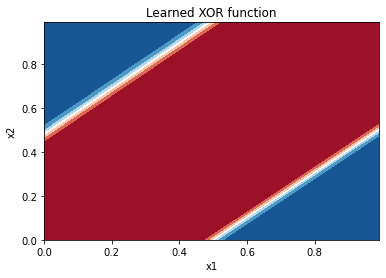

In [91]:
x_min, x_max = 0, 1
xx1, xx2 = np.meshgrid(np.arange(x_min, x_max, 0.01),
                       np.arange(x_min, x_max, 0.01))
x_test = np.array([xx1.ravel(), xx2.ravel()])
y_pred = predict(x_test)
y_pred = y_pred.reshape(xx1.shape)
plt.contourf(xx1, xx2, y_pred, cmap='RdBu')
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Learned XOR function')
plt.show()

## 2. Introduction to PyTorch

PyTorch is a Python based scientific computing package targeted at two sets of audiences:
- a replacement for NumPy to use the power of GPUs,
- a deep learning research platform that provides maximum flexibility and speed.

For more reading please visit http://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html

In [4]:
import torch

### 2.1 Tensors
Torch tensors are similar to NumPy ndarrays, with the addition being that they can also be used on a
GPU to accelerate computing. The documentation for tensors is available here http://pytorch.org/docs/stable/tensors.html

#### Construction

In [24]:
# Construct a 5x3 tensor and print it
x = torch.Tensor(5, 3)
print(x)
print(x.shape, x.dtype)

tensor([[9.4592e-39, 9.2755e-39, 8.4490e-39],
        [9.6428e-39, 1.1112e-38, 9.5511e-39],
        [1.0102e-38, 1.0286e-38, 1.0194e-38],
        [9.6429e-39, 9.2755e-39, 9.1837e-39],
        [9.3674e-39, 1.0745e-38, 1.0653e-38]])
torch.Size([5, 3]) torch.float32


In [25]:
# Construct a randomly initialized matrix 
# where each entry is a random number pulled from a uniform distribution from 0 to 1
y = torch.rand(5, 3)
print(y)
print(y.shape, y.dtype)

tensor([[0.1794, 0.6290, 0.3285],
        [0.2594, 0.3577, 0.8459],
        [0.6730, 0.2202, 0.9263],
        [0.4880, 0.9129, 0.6646],
        [0.2306, 0.9911, 0.3951]])
torch.Size([5, 3]) torch.float32


In [26]:
# Conversions
y = y.double()
print(y, y.dtype)

tensor([[0.1794, 0.6290, 0.3285],
        [0.2594, 0.3577, 0.8459],
        [0.6730, 0.2202, 0.9263],
        [0.4880, 0.9129, 0.6646],
        [0.2306, 0.9911, 0.3951]], dtype=torch.float64) torch.float64


#### Concatenation

In [27]:
# You can also initialize tensors directly with predefined values
x = torch.Tensor([[-0.1859, 1.3970, 0.5236],
                  [ 2.3854, 0.0707, 2.1970],
                  [-0.3587, 1.2359, 1.8951],
                  [-0.1189, -0.1376, 0.4647],
                  [-1.8968, 2.0164, 0.1092]])
y = torch.Tensor([[ 0.4838, 0.5822, 0.2755],
                  [ 1.0982, 0.4932, -0.6680],
                  [ 0.7915, 0.6580, -0.5819],
                  [ 0.3825, -1.1822, 1.5217],
                  [ 0.6042, -0.2280, 1.3210]])
print(x.shape, y.shape)

torch.Size([5, 3]) torch.Size([5, 3])


In [28]:
# You can stack the two 2d tensors in a 3d tensor as
z = torch.stack((x, y))
print(z)
print(z.shape)

tensor([[[-0.1859,  1.3970,  0.5236],
         [ 2.3854,  0.0707,  2.1970],
         [-0.3587,  1.2359,  1.8951],
         [-0.1189, -0.1376,  0.4647],
         [-1.8968,  2.0164,  0.1092]],

        [[ 0.4838,  0.5822,  0.2755],
         [ 1.0982,  0.4932, -0.6680],
         [ 0.7915,  0.6580, -0.5819],
         [ 0.3825, -1.1822,  1.5217],
         [ 0.6042, -0.2280,  1.3210]]])
torch.Size([2, 5, 3])


In [29]:
# Concatenates in the given dimension
z2 = torch.cat((x, y), dim=0)
print(z2)
print(z2.shape)

tensor([[-0.1859,  1.3970,  0.5236],
        [ 2.3854,  0.0707,  2.1970],
        [-0.3587,  1.2359,  1.8951],
        [-0.1189, -0.1376,  0.4647],
        [-1.8968,  2.0164,  0.1092],
        [ 0.4838,  0.5822,  0.2755],
        [ 1.0982,  0.4932, -0.6680],
        [ 0.7915,  0.6580, -0.5819],
        [ 0.3825, -1.1822,  1.5217],
        [ 0.6042, -0.2280,  1.3210]])
torch.Size([10, 3])


#### Accessing elements

In [30]:
# You can use standard NumPy-like indexing
print(x[:, 1])

tensor([ 1.3970,  0.0707,  1.2359, -0.1376,  2.0164])


#### Operations

In [31]:
# Adding two tensors i
print('x+y = ', x + y)
print('torch.add(x, y) = ', torch.add(x, y))
print('x.add(y) = ', x.add(y))
torch.add(x, y, out=x)
print('torch.add(x, y, out=x) = ', x)

x+y =  tensor([[ 0.2979,  1.9792,  0.7991],
        [ 3.4836,  0.5639,  1.5290],
        [ 0.4328,  1.8939,  1.3132],
        [ 0.2636, -1.3198,  1.9864],
        [-1.2926,  1.7884,  1.4302]])
torch.add(x, y) =  tensor([[ 0.2979,  1.9792,  0.7991],
        [ 3.4836,  0.5639,  1.5290],
        [ 0.4328,  1.8939,  1.3132],
        [ 0.2636, -1.3198,  1.9864],
        [-1.2926,  1.7884,  1.4302]])
x.add(y) =  tensor([[ 0.2979,  1.9792,  0.7991],
        [ 3.4836,  0.5639,  1.5290],
        [ 0.4328,  1.8939,  1.3132],
        [ 0.2636, -1.3198,  1.9864],
        [-1.2926,  1.7884,  1.4302]])
torch.add(x, y, out=x) =  tensor([[ 0.2979,  1.9792,  0.7991],
        [ 3.4836,  0.5639,  1.5290],
        [ 0.4328,  1.8939,  1.3132],
        [ 0.2636, -1.3198,  1.9864],
        [-1.2926,  1.7884,  1.4302]])


In [32]:
# Reshape a tensor with torch.view
x = torch.randn(4, 4)
y = x.view(16)
z = x.view(-1, 8) # the size -1 is inferred from other dimensions
print(x.size(), y.size(), z.size())

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


#### In-place operations

In [33]:
# Any operation that mutates a tensor in-place is post-fixed with an _. For example: 
x = torch.Tensor([[1, 2],
                  [3, 4]])
y = torch.Tensor([[-1, -2],
                  [-3, -4]])

print('x before=', x)
x.copy_(y)
print('x after copying y =', x)
x.t_() # will change x
print('x after transpose =', x)
print('y has not changed=', y)

x before= tensor([[1., 2.],
        [3., 4.]])
x after copying y = tensor([[-1., -2.],
        [-3., -4.]])
x after transpose = tensor([[-1., -3.],
        [-2., -4.]])
y has not changed= tensor([[-1., -2.],
        [-3., -4.]])


### **Question 6**

Generate 2 random tensors $x$ and $y$ of dimensions 10$\times$10 and 2$\times$100, respectively, resize them such
that the instruction `torch.mm(x, y)` performs a row vector by matrix multiplication resulting in a
row vector of dimensions 1$\times$ 2.

In [34]:
# COMPLETE 
x = torch.rand(10, 10)
y = torch.rand(2, 100)
x = x.view(1, 100)
y = y.view(100, 2)
z = torch.mm(x, y) 
print('z =', z)
print(z.size())

z = tensor([[24.1519, 24.5409]])
torch.Size([1, 2])


### 2.2 NumPy arrays and PyTorch tensors

### **Question 7**

Analyze the following code. Do $a$ and $b$ share the same memory locations?

In [79]:
# Converting
a = torch.ones(5)
print('a= ', a)
b = a.numpy()
print('b = ', b)
print(a.type(), type(b))

a=  tensor([1., 1., 1., 1., 1.])
b =  [1. 1. 1. 1. 1.]
torch.FloatTensor <class 'numpy.ndarray'>


Compare the effect of each of these three instructions separately

In [80]:
a[0] += 1
a.add_(1)
a += 1
a = a.add(1)

Converting NumPy arrays to a Torch tensor

In [37]:
a = np.ones(5)
b = torch.from_numpy(a)
np.add(a, 1, out=a)
print(a)
print(b)

[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


### 1.3 Running on GPU

Torch tensors can be moved onto GPU device's memory using `.to('cuda')` or `.cuda()` and back to CPU device with `.to('cpu')` or `.cpu()`.

Alternatively, a tensor can be directly allocated into the GPU using the device optional argument. 

In [38]:
# Use cuda if a GPU is available, otherwise stay on CPU
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

x = torch.randn(5, 3).to(device)
y = torch.randn(5, 3, device=device)
z = x + y

print(z.cpu().numpy())

cpu
[[ 2.0253239   1.9975264   0.5394549 ]
 [ 0.26035935 -0.6857132   1.779999  ]
 [-0.2200765  -1.5261323   0.65921783]
 [-0.80359215 -0.2794509  -3.163807  ]
 [-0.96344036 -1.6138668  -1.5446663 ]]


Note that moving data from CPU to GPU is slow, so try to do all the computations in GPU, and transfer the data back to CPU once all computations have been performed.

Note also that newer versions of PyTorch come with more advanced tools for manipulating GPU/CPU devices.

## 3. Automatic differentiation - Backpropagation
A central feature in PyTorch is the `autograd` package. It provides tools performing automatic differentiation for all operations based on Torch tensors. This means that the gradients of such operations will not
require to be explicitly programmed. It uses a *define-by-run framework* that computes these gradients
dynamically during runtime. This is really useful to apply the backpropagation algorithm, since `autograd` will deduce
automatically from the succession of forward operations what are the corresponding backward updates.  

A Torch tensor stores a flag `requires_grad`. By default, this attribute is set to *False*. If you set it to *True*, autograd will track all operations where this Tensor is involved. Any other tensor resulting from operations involving this tensor will have its `requires_grad` attribute set to *True* automatically.
When you finish your computation you can call `.backward()` and have the gradients computed automatically for all these tensors.
The gradient for these tensors will be accumulated into the `.grad` attribute.

### **Question 8**
- Analyze the equation $$f(x) = f(x_1,x_2,x_3,x_4)=x_1+x_2+x_3+x_4$$ implemented below  

In [39]:
x = torch.ones(4, requires_grad=True)
f = x.sum()
print(x, f)

tensor([1., 1., 1., 1.], requires_grad=True) tensor(4., grad_fn=<SumBackward0>)


- Derive the partial derivatives for each $x_i$:
$$
\begin{align}\left(\nabla_x f(x)\right)_i &= \frac{\partial f(x_1,x_2,x_3,x_4)}{\partial x_i}\\
&= \ldots \end{align}$$

- Compare your result with the *autograd* result:

In [40]:
f.backward() # That's it!
print(x.grad)

tensor([1., 1., 1., 1.])


- Same question for the following equation:

$$f(x) = f(x_1,x_2,x_3,x_4)=\frac{1}{4}\sum_i 3(x_i+2)^2$$ 
\begin{align}\left(\nabla_x f(x)\right)_i &= \frac{\partial f(x_1,x_2,x_3,x_4)}{\partial x_i}\\
&=\frac{6}{4}(x_i+2)=4.5\end{align}

In [41]:
x = torch.ones(2, 2, requires_grad=True)
y = x + 2
z = y * y * 3
f = z.mean()
f.backward() 

## 4. Implementing a neural network in PyTorch

Let us rewrite the XOR neural network with PyTorch, following the tutorial at: https://uvadlc-notebooks.readthedocs.io/en/latest/tutorial_notebooks/tutorial2/Introduction_to_PyTorch.html

#### Dataset 
PyTorch provides some functionalities to load the training and test data efficiently. The data package defines two classes which are the standard interface for handling data in PyTorch: `data.Dataset`, and `data.DataLoader`. 

In [1]:
import torch.utils.data as data

The dataset class summarizes the basic functionality of a dataset. To define a dataset in PyTorch, we specify two functions: `__getitem__`, and `__len__`.  For the XOR dataset, we can define the dataset class as follows:

In [2]:
class XORDataset(data.Dataset):

    def __init__(self, n_samples, std=0.1):
        """
        Inputs:
            n_samples - Number of data points we want to generate
            std - Standard deviation of the noise
        """
        super().__init__()
        self.n_samples = n_samples
        self.std = std
        # Generate data samples
        self.data = torch.randint(low=0, high=2, size=(self.n_samples, 2), dtype=torch.float32)
        self.labels = (self.data.sum(dim=1) == 1).to(torch.int)
        self.data += self.std * torch.randn(self.data.shape)

    def __len__(self):
        # Number of data points we have. Alternatively self.data.shape[0], or self.labels.shape[0]
        return self.n_samples

    def __getitem__(self, index):
        # Return the index-th data point of the dataset
        # If we have multiple things to return (data point and label), we can return them as tuple
        data_point = self.data[index]
        data_label = self.labels[index]
        return data_point, data_label

In [11]:
train_dataset = XORDataset(n_samples=500)

### **Question 9**
What is the size of the dataset? What are the coordinates of the first point?

In [ ]:
# COMPLETE (500, 2) (n_sample, point_size)

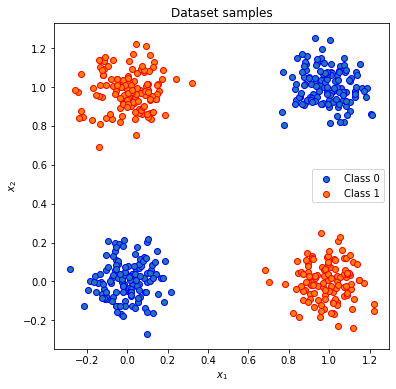

In [12]:
visualize_samples(train_dataset.data.numpy(), train_dataset.labels.numpy())
plt.show()

###  Batches
Let us now use the dataloader to handle batches 

In [13]:
print(train_dataset.data.shape)
data_loader = data.DataLoader(train_dataset, batch_size=4, shuffle=True)

# next(iter(...)) catches the first batch of the data loader
# If shuffle is True, it will randomly sample data from the dataset.
# For iterating over the whole dataset, we can simple use "for batch in data_loader: ..."
x_train_b, d_train_b = next(iter(data_loader))

# The shape of the outputs are [batch_size, d_1,...,d_N] where d_1,...,d_N are the
# dimensions of the data point returned from the dataset class
print("Data inputs", x_train_b.shape)
print("Data labels", d_train_b.shape)

torch.Size([500, 2])
Data inputs torch.Size([4, 2])
Data labels torch.Size([4])


### The network

The package `torch.nn` defines a series of useful classes like linear networks layers, activation functions, loss functions etc.

In [14]:
import torch.nn as nn

We define a 2-layers neural network with two neurons in the hidden layer. 
Each linear layer has a weight matrix of the shape `[output, input]`, and a bias of the shape `[output]`. The Sigmoid activation function does not have any parameters. 
There are two inputs neurons, representing the two coordinates of a data point.

In [15]:
class XORClassifier(nn.Module):

    def __init__(self, num_inputs, num_hidden, num_outputs):
        super().__init__()
        # Initialize the modules we need to build the network
        self.linear1 = nn.Linear(num_inputs, num_hidden)
        self.act_fn = nn.Sigmoid()
        self.linear2 = nn.Linear(num_hidden, num_outputs)


    def forward(self, x):
        # Perform the calculation of the model to determine the prediction
        x = self.linear1(x)
        x = self.act_fn(x)
        x = self.linear2(x)
        return x
    
model = XORClassifier(num_inputs=2, num_hidden=2, num_outputs=1)
# Printing a module shows all its submodules
print(model)

XORClassifier(
  (linear1): Linear(in_features=2, out_features=2, bias=True)
  (act_fn): Sigmoid()
  (linear2): Linear(in_features=2, out_features=1, bias=True)
)


Print the model parameters :

In [16]:
for name, param in model.named_parameters():
    print("Parameter %s, shape %s" % (name, str(param.shape)))

Parameter linear1.weight, shape torch.Size([2, 2])
Parameter linear1.bias, shape torch.Size([2])
Parameter linear2.weight, shape torch.Size([1, 2])
Parameter linear2.bias, shape torch.Size([1])


### Loss
We again use the binary cross entropy loos

In [17]:
loss_fun = nn.BCEWithLogitsLoss()

### Optimizer
For updating the parameters, PyTorch provides the package `torch.optim` that has most popular optimizers implemented. Here, we use Stochastic Gradient Descent (SGD).

In [18]:
# Input to the optimizer are the parameters of the model: model.parameters()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

### Training
Let us now implement the training loop that performs the forward pass, calculates the loss, and apply backpropagation to update the weights. 

In [37]:
def train_model(model, optimizer, data_loader, loss_fun, num_epochs=200):
    # Set model to train mode
    model.train()

    # Training loop
    for epoch in range(num_epochs):
        for (data_inputs, data_labels) in data_loader:

            ## Step 1: Run the model on the input data
            preds = model(data_inputs)
            preds = preds.squeeze(dim=1) # Output is [Batch size, 1], but we want [Batch size]

            ## Step 2: Calculate the loss
            loss = loss_fun(preds, data_labels.float())
            
            ## Step 3: Perform backpropagation
            # Before calculating the gradients, we need to ensure that they are all zero.
            # Otherwise, the gradients would be accumulating to the previous ones.
            optimizer.zero_grad()
            # Perform backpropagation
            loss.backward()

            ## Step 4: Update the parameters
            optimizer.step()
        if epoch % 20 == 0:
            print("Epoch: {0}, Loss: {1}, ".format(epoch, loss))
    print("Final Loss: {0}".format(loss))

In [38]:
train_model(model, optimizer, data_loader, loss_fun)

Epoch: 0, Loss: 0.0005770413554273546, 
Epoch: 20, Loss: 0.0008783935336396098, 
Epoch: 40, Loss: 0.0006256712367758155, 
Epoch: 60, Loss: 0.0008241847390308976, 
Epoch: 80, Loss: 0.0005583628080785275, 
Epoch: 100, Loss: 0.0006482226890511811, 
Epoch: 120, Loss: 0.0014751330018043518, 
Epoch: 140, Loss: 0.0007290499052032828, 
Epoch: 160, Loss: 0.0005761072970926762, 
Epoch: 180, Loss: 0.002582899760454893, 
Final Loss: 0.0007375895511358976


Show the learned parameters:

In [41]:
state_dict = model.state_dict()
print(state_dict)

OrderedDict([('linear1.weight', tensor([[7.1729, 6.9003],
        [8.5737, 9.3091]])), ('linear1.bias', tensor([-10.3301,  -4.2475])), ('linear2.weight', tensor([[-16.6522,  15.9766]])), ('linear2.bias', tensor([-7.4481]))])


### **Question 10** - Testing and decision boundary
Apply the network on a test set, an visualize the decision boundary

In [77]:
def plot_decision_boundray():
    x_span = np.arange(x_min, x_max, 0.01)
    y_span = np.arange(x_min, x_max, 0.01)
    xx, yy = np.meshgrid(x_span, y_span)
    grid = torch.tensor(np.c_[xx.ravel(), yy.ravel()]).float()
    y_pred = model.forward(grid).view(xx.shape).detach().numpy()
    print(y_pred)
    plt.imshow(y_pred, cmap='RdBu', extent=[0, 1, 0, 1])
    plt.show()

[[-7.223434  -7.20362   -7.182089  ...  7.707571   7.689682   7.66733  ]
 [-7.2018375 -7.180152  -7.1565924 ...  7.693016   7.6706295  7.6437635]
 [-7.178201  -7.1544733 -7.128703  ...  7.673913   7.64703    7.6156244]
 ...
 [ 7.9684153  7.9483376  7.9252157 ... -7.5432396 -7.582115  -7.6184673]
 [ 7.9504356  7.927329   7.9011164 ... -7.5806847 -7.6171303 -7.651203 ]
 [ 7.929431   7.903243   7.8738775 ... -7.6157875 -7.64995   -7.681875 ]]


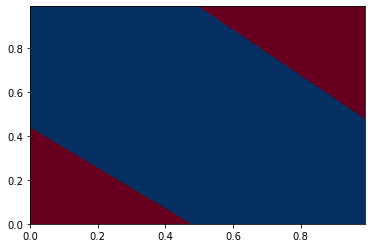

In [78]:
x_min, x_max = 0, 1
xx1, xx2 = np.meshgrid(np.arange(x_min, x_max, 0.01),
                       np.arange(x_min, x_max, 0.01))
x_test = torch.from_numpy(np.array([xx1.ravel(), xx2.ravel()]).astype(np.float32).T)
y_pred = model(x_test)

plot_decision_boundray()
# plt.contourf(xx1, xx2, y_pred, alpha=0.4, cmap='RdBu')
# plt.xlim(xx1.min(), xx1.max())
# plt.ylim(xx2.min(), xx2.max())
# plt.xlabel('x1')
# plt.ylabel('x2')
# plt.title('Learned XOR function')
# plt.show()